First, let's import the required libraries and packages

In [255]:
from google.colab import drive
from pathlib import Path
import glob
import os

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import json to view the json data provided
import json

#basic data analysis libraries
import pandas as pd
import numpy as np
from collections import Counter

#visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

#Text Libraries

#NLTK
#!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('omw-1.4')

#String
import string
from textblob import TextBlob
import re
import spacy

#sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

#Gensim
import gensim
from gensim import corpora
!pip install pyLDAvis==2.1.2
import pyLDAvis
import pyLDAvis.gensim


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading : Package '' not found in index
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/rizkyario/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


Opening the JSON file using the json library

In [256]:
# Opening the JSON file
json_dir = './data/vestiairecollective'

json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfs = []
for file in file_list:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
        json_data['site'] = file.rsplit("/", 1)[-1]
    dfs.append(json_data)
df = pd.concat(dfs)
print(len(df))

1971


Opening the JSON data using Pandas

In [257]:
#Using Pandas

json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfs = []
for file in file_list:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
        json_data['site'] = file.rsplit("/", 1)[-1]
    dfs.append(json_data)
reviewsDF = pd.concat(dfs)
reviewsDF.head(10)

,date,author,text,title,stars,location,url,site
0,2022-02-22,customer,My package was never delivered. Vestiaire dema...,"AWFUL EXPERIENCE, AVOID",1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
1,2022-02-22,Monica Dougall,I sold a paid of Dior jeans on the site. Brand...,Awful customer expereince,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
2,2022-02-22,SS,I have had the worst experience shopping at Ve...,I have had the worst experience…,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
3,2022-02-23,J Steventon,"I sell very little on this site, charges are e...",Poor customer service and extortionate costs,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
4,2022-02-23,Daria Belinska,Almost every time when I post an item for sale...,Almost every time when I post an item…,2,FR,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
5,2022-02-23,david botero,One word... HORRIBLE. \nSold a Cartier bracele...,One word.. HORRIBLE,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
6,2022-02-23,Alaria,Worst experience!!!\nI wanted to sell a bag th...,Worst experience ever! Avoid this company!,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
7,2022-02-23,Sophia Rashid,Awful customer service \nI received a faulty i...,Awful customer service,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
8,2022-02-24,Martin Moore,Having complained to vestiaire about poor serv...,False advertising,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
9,2022-02-24,Ekaterina,"Hello!\nI’m the seller, I’ve sold the Gucci ri...",They lost my item,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json


# **Data Cleaning**

Round 1 of cleaning: 

- Converting the text to Lowercase

- Removing text in brackets

- Removing punctuation and words

In [258]:
#Round 1 of cleaning
def clean_text(text):
    # converting to lower
    text = text.lower() 
    #remove text in square brackets
    text = re.sub('\[.*?\]','',text)
    #remove punctuation and remove words
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [259]:
reviewsDF.title = reviewsDF.title.apply(clean_text)
reviewsDF.text = reviewsDF.text.apply(clean_text)
reviewsDF.head()

,date,author,text,title,stars,location,url,site
0,2022-02-22,customer,my package was never delivered vestiaire deman...,awful experience avoid,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
1,2022-02-22,Monica Dougall,i sold a paid of dior jeans on the site brand ...,awful customer expereince,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
2,2022-02-22,SS,i have had the worst experience shopping at ve...,i have had the worst experience…,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
3,2022-02-23,J Steventon,i sell very little on this site charges are ex...,poor customer service and extortionate costs,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
4,2022-02-23,Daria Belinska,almost every time when i post an item for sale...,almost every time when i post an item…,2,FR,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json


Round 2 of Cleaning:

- Removing additional punctuation

- Removing non-sensical text

In [260]:
#Round 2 of cleaning
def clean_text2(text):
    '''get rid of some additional punctuation and non-sesical text that was missed the first time'''
    text = re.sub('[''""...]','',text)
    text = re.sub('\n','',text)
    return text

In [261]:
reviewsDF.title = reviewsDF.title.apply(clean_text2)
reviewsDF.text = reviewsDF.text.apply(clean_text2)
reviewsDF.head()

,date,author,text,title,stars,location,url,site
0,2022-02-22,customer,my package was never delivered vestiaire deman...,awful experience avoid,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
1,2022-02-22,Monica Dougall,i sold a paid of dior jeans on the site brand ...,awful customer expereince,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
2,2022-02-22,SS,i have had the worst experience shopping at ve...,i have had the worst experience…,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
3,2022-02-23,J Steventon,i sell very little on this site charges are ex...,poor customer service and extortionate costs,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
4,2022-02-23,Daria Belinska,almost every time when i post an item for sale...,almost every time when i post an item…,2,FR,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json


Round 3 of Cleaning:

- Punctuation

- Words containing numbers

- Stopwords

- Empty tokens

- Part of Speech Tagging

- Lemmatization

- Removing one letter words

In [262]:
#Round 3 of cleaning (postag, stopwords removal and lemmatization etc)
def get_wordnet_pos(word):
    #Map POS tag to first letter
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
    
def clean_text3(text):
    #tokenizing removing puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    #removing words containing numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    #removing stopwords
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    #removing empty tokens
    text = [t for t in text if len(t) > 0]
    #part of speech tagging
    pos_tags = pos_tag(text)
    #lemmatizing text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    #removing one letter words
    text = [t for t in text if len(t) > 1]
    #joining
    text = " ".join(text)
    return(text)

In [263]:
reviewsDF.title = reviewsDF.title.apply(clean_text3)
reviewsDF.text = reviewsDF.text.apply(clean_text3)
reviewsDF.head()

,date,author,text,title,stars,location,url,site
0,2022-02-22,customer,package never delivered vestiaire demanded sen...,awful experience avoid,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
1,2022-02-22,Monica Dougall,sold paid dior jean site brand new never worn ...,awful customer expereince,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
2,2022-02-22,SS,worst experience shopping vestiaire it’s impos...,worst experience…,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
3,2022-02-23,J Steventon,sell little site charge extortionate cannot se...,poor customer service extortionate cost,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json
4,2022-02-23,Daria Belinska,almost every time post item sale description m...,almost every time post item…,2,FR,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json


Save the Cleaned data for easy later use

In [264]:
#Pickling the DF for later use
reviewsDF.to_pickle("corpus.pkl")

# **Feature Engineering**

Adding new columns for
1. Length
2. Word Count
3. Polarity
4. Sentiment
5. Rating
6. Website

In [265]:
#Let's add a column length, which indicates the length of each text
reviewsDF['length'] = reviewsDF['text'].apply(len)
#Adding a column numOfWords which indicates the number of words in the text
reviewsDF['numOfWords'] = reviewsDF['text'].apply(lambda x: len(x.split(" ")))
#Adding a Polarity column - using TextBlob
reviewsDF['polarity'] = reviewsDF['text'].map(lambda text: TextBlob(text).sentiment.polarity)
#Adding Sentiment Intensity column - using SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
reviewsDF["sentiments"] = reviewsDF["text"].apply(lambda x: sid.polarity_scores(x))
reviewsDF = pd.concat([reviewsDF.drop(['sentiments'], axis=1), reviewsDF['sentiments'].apply(pd.Series)], axis=1)
reviewsDF.head()

,date,author,text,title,stars,location,url,site,length,numOfWords,polarity,neg,neu,pos,compound
0,2022-02-22,customer,package never delivered vestiaire demanded sen...,awful experience avoid,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,475,67,0.014286,0.091,0.726,0.183,0.6437
1,2022-02-22,Monica Dougall,sold paid dior jean site brand new never worn ...,awful customer expereince,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,451,72,-0.202746,0.198,0.764,0.039,-0.9024
2,2022-02-22,SS,worst experience shopping vestiaire it’s impos...,worst experience…,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,269,38,-0.266667,0.172,0.654,0.174,0.0232
3,2022-02-23,J Steventon,sell little site charge extortionate cannot se...,poor customer service extortionate cost,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,299,45,-0.022917,0.165,0.706,0.128,-0.2500
4,2022-02-23,Daria Belinska,almost every time post item sale description m...,almost every time post item…,2,FR,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,181,26,-0.550000,0.195,0.805,0.000,-0.7003


In [266]:
#Adding a Sentiment column depending on the calculated compound score
reviewsDF['Sentiment'] = reviewsDF['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
reviewsDF.Sentiment.value_counts()

neg    1192
pos     779
Name: Sentiment, dtype: int64

In [267]:
#Adding a column (numeric) for rating
#reviewsDF.stars.value_counts()
reviewsDF['rating'] = reviewsDF['stars']
reviewsDF.head()

,date,author,text,title,stars,location,url,site,length,numOfWords,polarity,neg,neu,pos,compound,Sentiment,rating
0,2022-02-22,customer,package never delivered vestiaire demanded sen...,awful experience avoid,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,475,67,0.014286,0.091,0.726,0.183,0.6437,pos,1
1,2022-02-22,Monica Dougall,sold paid dior jean site brand new never worn ...,awful customer expereince,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,451,72,-0.202746,0.198,0.764,0.039,-0.9024,neg,1
2,2022-02-22,SS,worst experience shopping vestiaire it’s impos...,worst experience…,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,269,38,-0.266667,0.172,0.654,0.174,0.0232,pos,1
3,2022-02-23,J Steventon,sell little site charge extortionate cannot se...,poor customer service extortionate cost,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,299,45,-0.022917,0.165,0.706,0.128,-0.2500,neg,1
4,2022-02-23,Daria Belinska,almost every time post item sale description m...,almost every time post item…,2,FR,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,181,26,-0.550000,0.195,0.805,0.000,-0.7003,neg,2


In [268]:
#Analyzing URL column
reviewsDF.url.str.split("review/")[0]
reviewsDF['Site'] = reviewsDF.url.apply(lambda x: x.split("review/")[1])
reviewsDF.head()

,date,author,text,title,stars,location,url,site,length,numOfWords,polarity,neg,neu,pos,compound,Sentiment,rating,Site
0,2022-02-22,customer,package never delivered vestiaire demanded sen...,awful experience avoid,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,475,67,0.014286,0.091,0.726,0.183,0.6437,pos,1,vestiairecollective.com?page=15&stars=1&stars=...
1,2022-02-22,Monica Dougall,sold paid dior jean site brand new never worn ...,awful customer expereince,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,451,72,-0.202746,0.198,0.764,0.039,-0.9024,neg,1,vestiairecollective.com?page=15&stars=1&stars=...
2,2022-02-22,SS,worst experience shopping vestiaire it’s impos...,worst experience…,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,269,38,-0.266667,0.172,0.654,0.174,0.0232,pos,1,vestiairecollective.com?page=15&stars=1&stars=...
3,2022-02-23,J Steventon,sell little site charge extortionate cannot se...,poor customer service extortionate cost,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,299,45,-0.022917,0.165,0.706,0.128,-0.2500,neg,1,vestiairecollective.com?page=15&stars=1&stars=...
4,2022-02-23,Daria Belinska,almost every time post item sale description m...,almost every time post item…,2,FR,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,181,26,-0.550000,0.195,0.805,0.000,-0.7003,neg,2,vestiairecollective.com?page=15&stars=1&stars=...


In [269]:
reviewsDF.Site.value_counts()

vestiairecollective.com?page=15&stars=1&stars=2&stars=3    20
vestiairecollective.com?page=50&stars=1&stars=2&stars=3    20
vestiairecollective.com?page=92&stars=1&stars=2&stars=3    20
vestiairecollective.com?page=51&stars=1&stars=2&stars=3    20
vestiairecollective.com?page=47&stars=1&stars=2&stars=3    20
                                                           ..
vestiairecollective.com?page=43&stars=1&stars=2&stars=3    18
vestiairecollective.com?page=66&stars=1&stars=2&stars=3    18
vestiairecollective.com?page=73&stars=1&stars=2&stars=3    18
vestiairecollective.com?page=65&stars=1&stars=2&stars=3    18
vestiairecollective.com?page=77&stars=1&stars=2&stars=3    16
Name: Site, Length: 100, dtype: int64

# **EDA**

Exploratory Data Analysis

In [270]:
#This function is used to see mathematical metrics of all the columns 
reviewsDF.describe()

,stars,length,numOfWords,polarity,neg,neu,pos,compound,rating
count,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000
mean,1.169964,501.434805,72.362760,-0.044145,0.163258,0.709563,0.126667,-0.164076,1.169964
std,0.542630,436.753858,62.365655,0.231661,0.105047,0.121922,0.091994,0.651514,0.542630
min,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,-0.996700,1.000000
25%,1.000000,210.000000,31.000000,-0.142033,0.094000,0.641000,0.070000,-0.771700,1.000000
50%,1.000000,363.000000,53.000000,-0.003333,0.151000,0.717000,0.118000,-0.311100,1.000000
75%,1.000000,657.000000,96.000000,0.082619,0.214000,0.788000,0.174000,0.440400,1.000000
max,5.000000,3097.000000,432.000000,0.800000,0.756000,1.000000,1.000000,0.994600,5.000000


In [271]:
#To see the type of each column and check if there are any null values 
reviewsDF.date = pd.to_datetime(reviewsDF['date'])
reviewsDF = reviewsDF[reviewsDF.stars < 4]
reviewsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 0 to 19
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1958 non-null   datetime64[ns]
 1   author      1958 non-null   object        
 2   text        1958 non-null   object        
 3   title       1958 non-null   object        
 4   stars       1958 non-null   int64         
 5   location    1958 non-null   object        
 6   url         1958 non-null   object        
 7   site        1958 non-null   object        
 8   length      1958 non-null   int64         
 9   numOfWords  1958 non-null   int64         
 10  polarity    1958 non-null   float64       
 11  neg         1958 non-null   float64       
 12  neu         1958 non-null   float64       
 13  pos         1958 non-null   float64       
 14  compound    1958 non-null   float64       
 15  Sentiment   1958 non-null   object        
 16  rating      1958 non-null 

In [272]:
#To count number of samples for each rating
reviewsDF.rating.value_counts()

1    1756
2     117
3      85
Name: rating, dtype: int64

<AxesSubplot:>

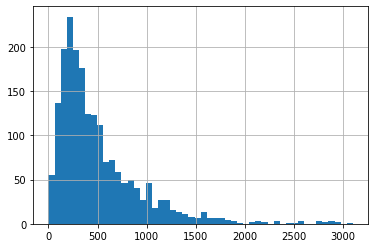

In [273]:
# Review length distribution
reviewsDF['length'].hist(bins=50)

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>, <AxesSubplot:>]], dtype=object)

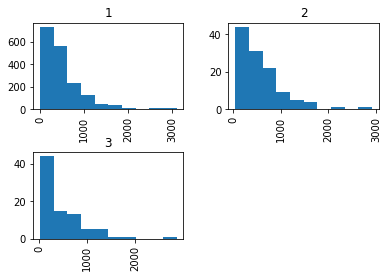

In [274]:
#Histogram plot to see the lenght of each rating
reviewsDF.hist(column = 'length', by = 'rating')

In [275]:
#Histogram plot to analyze number of reviews with respect to date
#As we can see, 2018 has many reviews comapared to other years
fig = px.histogram(reviewsDF, x='date', title='Reviews by date')
fig.update_xaxes(categoryorder='category descending', title='Date').update_yaxes(title='Number of reviews')
fig.show()

In [276]:
#Histogram plot to analyze number of reviews with respect to date and ratings
#As we can see there are many one star ratings compared to all other ratings 
fig = px.histogram(reviewsDF, x='date',  title='Reviews by date', color='rating', nbins=10, log_y=True, barmode='group')
fig.update_xaxes(categoryorder='category descending', title='Date').update_yaxes(title='Number of reviews')
fig.show()

<AxesSubplot:>

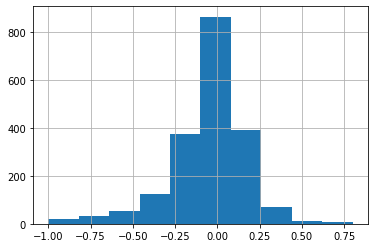

In [277]:
#Histogram plot for polarity, and by observing we say that there are many reviwes with the polarity between 0 to 0.25
reviewsDF.polarity.hist()

<AxesSubplot:>

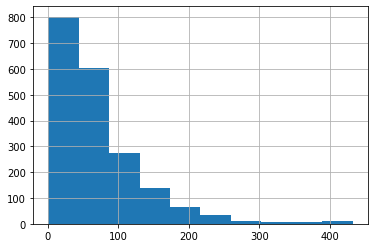

In [278]:
#Plot to analyze number of words
reviewsDF['numOfWords'].hist()

In [279]:
#top positive reviews
reviewsDF.sort_values("pos", ascending = False)[["text", "pos", "neg", "stars"]].head(20)

,text,pos,neg,stars
1,good i’m satisfied,0.851,0.000,3
16,generally good experience technical aspect nee...,0.545,0.000,3
0,awful keep money long profit interest,0.496,0.252,1
5,wish could give star,0.474,0.000,1
12,like vestiaire checking fee expensive would li...,0.459,0.000,3
2,fee high reason recommend,0.455,0.000,1
15,want sell clothes profit isnt place stupid com...,0.427,0.000,1
17,disorganised chaono thanks i’ll pas,0.420,0.000,1
9,nonexistent customer service staff promising a...,0.410,0.050,1
15,customer service absolutely helpless rather ap...,0.402,0.203,1


In [280]:
#Analyzing the negative data - ascending order 
reviewsDF.sort_values("neg", ascending = False)[["text", "pos", "neg", "stars"]].head(20)

,text,pos,neg,stars
17,administer unfair,0.000,0.756,1
0,avoid horrendous service bad customer service ...,0.000,0.663,1
11,purchase selling fake authenticated item waste...,0.000,0.653,1
17,terrible terrible terrible worst customer serv...,0.000,0.650,1
13,horrible made mistake customer support useless,0.201,0.649,1
19,terrible simple incompetent simple thing made ...,0.000,0.643,1
8,bad expierence never,0.000,0.636,1
3,terrible experiencewasn’t paid item soldtotal ...,0.000,0.630,1
19,frustrating company unable manage system disap...,0.000,0.600,1
1,awful expensive experience,0.000,0.600,1


In [281]:
# reviewsDF['length'][1234]

In [1]:
#WordCloud of text in the complete data set
from wordcloud import STOPWORDS

stopwords = ['item', 'm', 'ive'] + list(STOPWORDS)

text = " ".join(i for i in reviewsDF.text)
wordcloud = WordCloud(stopwords = stopwords, width=800, height=400).generate(text)
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

NameError: name 'reviewsDF' is not defined

In [283]:
#Percentage of each word in the wordcloud
wordcloud.words_

{'seller': 1.0,
 'customer service': 0.9488151658767773,
 'buyer': 0.771563981042654,
 'sold': 0.7023696682464455,
 'bag': 0.6919431279620853,
 'time': 0.6208530805687204,
 'one': 0.6132701421800948,
 'sent': 0.5620853080568721,
 's': 0.5355450236966824,
 'company': 0.5090047393364929,
 'back': 0.4758293838862559,
 'never': 0.46729857819905213,
 'day': 0.4663507109004739,
 'money': 0.46350710900473935,
 'even': 0.45402843601895737,
 'still': 0.42938388625592416,
 'told': 0.418957345971564,
 'said': 0.4075829383886256,
 'sale': 0.4037914691943128,
 'refund': 0.4,
 'email': 0.395260663507109,
 'issue': 0.3933649289099526,
 'received': 0.385781990521327,
 'chat': 0.34881516587677724,
 'paid': 0.34218009478672984,
 'say': 0.3412322274881517,
 'don t': 0.3412322274881517,
 'order': 0.33933649289099527,
 'fake': 0.3345971563981043,
 'website': 0.32132701421800947,
 'problem': 0.3080568720379147,
 'payment': 0.3023696682464455,
 'sell': 0.3004739336492891,
 'bought': 0.3004739336492891,
 'sen

# **Topic Modelling**

In [284]:
reviewData = reviewsDF['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)

In [285]:
#Let's consider the top 20 topics
n_topics = 20
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [286]:
def getCategoriesCounts(lsa_topic_matrix):
  keys = lsa_topic_matrix.argmax(axis=1).tolist()
  count_pairs = Counter(keys).items()
  categories = [pair[0] for pair in count_pairs]
  counts = [pair[1] for pair in count_pairs]
  return (keys,categories, counts)

In [287]:
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)

In [288]:
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    top_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        if hasattr(temp_vector_sum, 'toarray'):
            temp_vector_sum = temp_vector_sum.toarray()
            top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
            top_indices.append(top_n_word_indices)   
        else:
            top_indices.append([])
    top_words = []
    for topic in top_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [289]:
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  item customer service
Topic 2:  bag fake vc
Topic 3:  buyer lower sale
Topic 4:  service customer worst
Topic 5:  order refund vestiaire
Topic 6:  fake profit comissions
Topic 7:  refund order shoe
Topic 8:  seller price sell
Topic 9:  uk custom import
Topic 10:  deleted account bad
Topic 11:  fake item authentic
Topic 12:  shoe size seller
Topic 13:  unsubscribe euro email
Topic 14:  shipping hate chronopost
Topic 15:  don app ve
Topic 16:  shoe size vestiairecollectivecom
Topic 17:  unsubscribe bay newsletter
Topic 18:  teased appears asked
Topic 19:  coat stay time
Topic 20:  avoid company scam


We can see the top 20 topics in the whole dataset

Now let's compare the topics year by year

In [290]:
reviewsDF.date.describe()

count                    1958
unique                    574
top       2021-02-03 00:00:00
freq                       12
first     2020-08-22 00:00:00
last      2022-05-08 00:00:00
Name: date, dtype: object

In [291]:
reviewsDF.date.dt.year.value_counts() #to know the years of the available data

2021    1084
2022     500
2020     374
Name: date, dtype: int64

In [292]:
#subset the full dataset into yearly dataframes
reviewsDF2020 = reviewsDF[reviewsDF.date.dt.year==2020]
reviewsDF2021 = reviewsDF[reviewsDF.date.dt.year==2021]
reviewsDF2022 = reviewsDF[reviewsDF.date.dt.year==2022]

Let's perform LSA to understand the topics for each year

In [293]:
#2020
reviewData = reviewsDF2020['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)
#Let's consider the top 2 topics
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
top_2020 = top_n_words_lsa
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  item seller service
Topic 2:  bag fake check
Topic 3:  week information company
Topic 4:  payment week expierence
Topic 5:  shoe fake earring
Topic 6:  offer collective sep
Topic 7:  order size number
Topic 8:  sad good pochette
Topic 9:  fake authentic portion
Topic 10:  shoe earring reply


In [294]:
#2021
reviewData = reviewsDF2021['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)
#Let's consider the top 14 topics
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
top_2021 = top_n_words_lsa
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  item vc customer
Topic 2:  bag fake authentic
Topic 3:  bag received service
Topic 4:  service customer worst
Topic 5:  uk custom duty
Topic 6:  uk import custom
Topic 7:  refund shoe ok
Topic 8:  seller badge price
Topic 9:  money payment transfer
Topic 10:  unsubscribe app company


In [295]:
#2022
reviewData = reviewsDF2022['text']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reviewData = reviewData.values
document_term_matrix = tfidf_vectorizer.fit_transform(reviewData)
#Let's consider the top 15 topics
n_topics = 10
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)
lsa_keys, lsa_categories, lsa_counts = getCategoriesCounts(lsa_topic_matrix)
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
top_2022 = top_n_words_lsa
for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  item vestiaire customer
Topic 2:  bag fake authenticity
Topic 3:  service bad experience
Topic 4:  shipping commission item
Topic 5:  euro shipping vc
Topic 6:  payment email month
Topic 7:  account deleted company
Topic 8:  refund order shoe
Topic 9:  satisfied application vc
Topic 10:  avoid use stop


Visualizing the word cloud for each year to understand the most common words

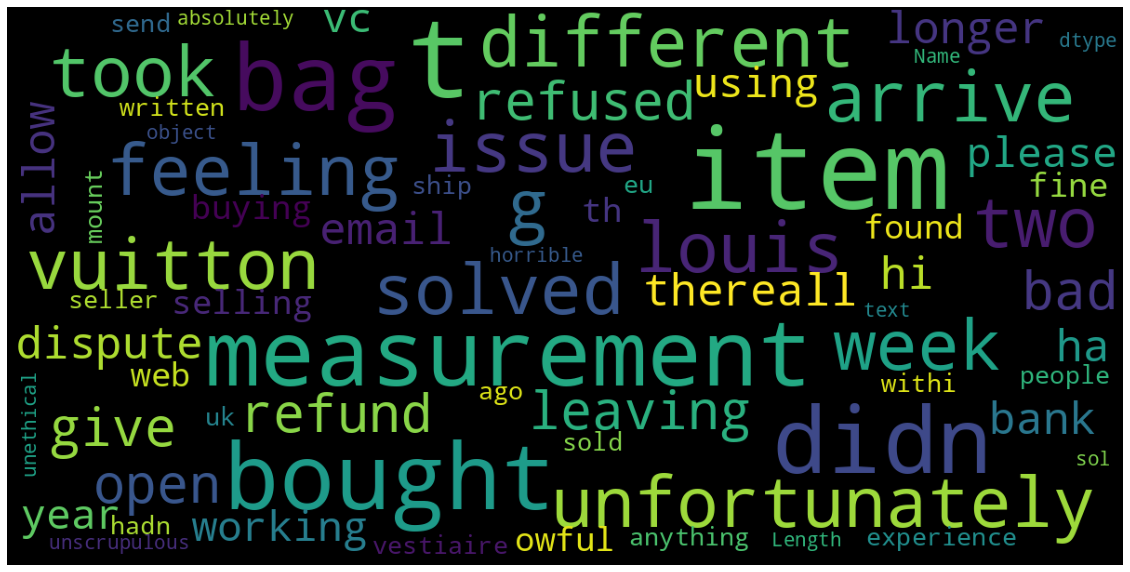

In [296]:
#2020

text = " ".join(i for i in reviewsDF2020.text)
wordcloud = WordCloud(stopwords = stopwords, width=800, height=400).generate(text)
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud2020)
plt.show()

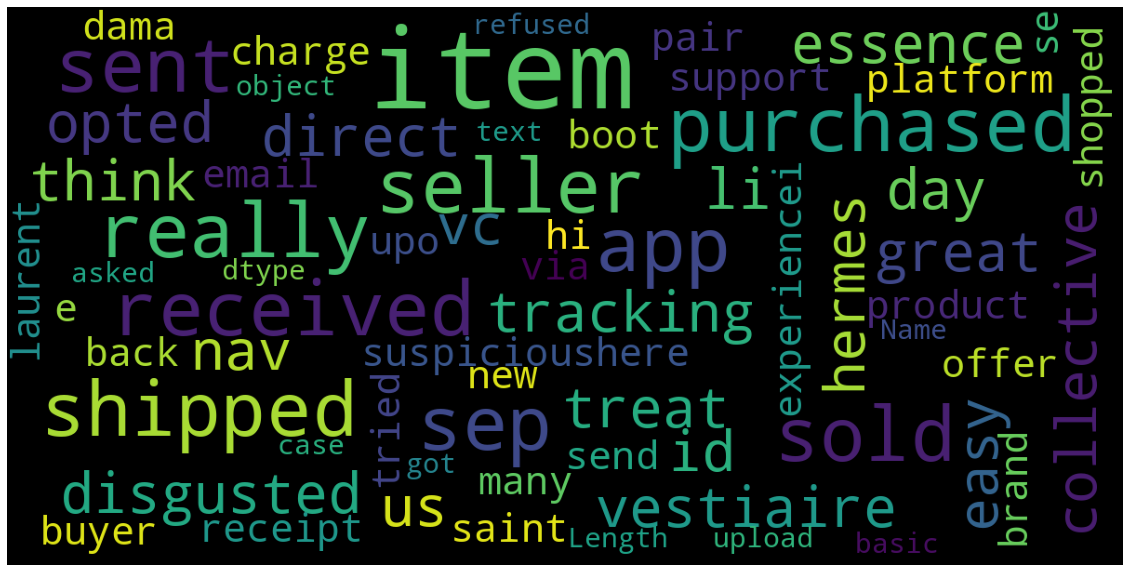

In [297]:
#2021

text = " ".join(i for i in reviewsDF2021.text)
wordcloud = WordCloud(stopwords = stopwords, width=800, height=400).generate(text)
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud2021)
plt.show()

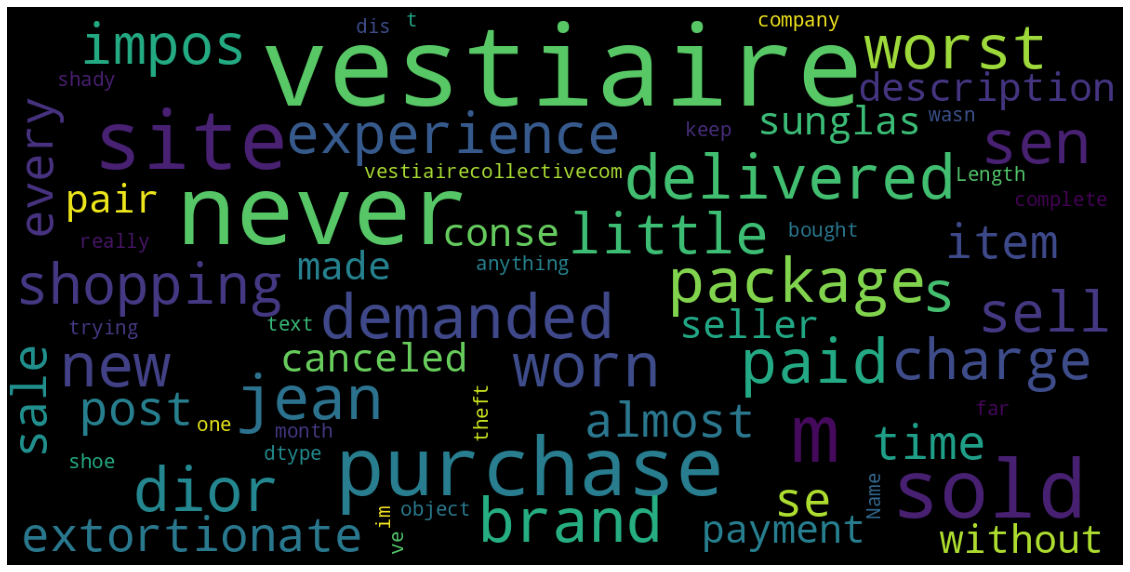

In [298]:
#2022

text = " ".join(i for i in reviewsDF2022.text)
wordcloud = WordCloud(stopwords = stopwords, width=800, height=400).generate(text)
fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')
plt.imshow(wordcloud2022)
plt.show()

In [299]:
#Let's create a df with the top topics for all the years
l1,l5,l6=len(top_2020),len(top_2021),len(top_2022)
max_len = max(l1,l5,l6,l7,l8)

if not max_len == l1:
  top_2020.extend(['-']*(max_len-l1))
if not max_len == l5:
  top_2021.extend(['-']*(max_len-l5))
if not max_len == l6:
  top_2022.extend(['-']*(max_len-l6))

topicsDF = pd.DataFrame({'2020':top_2020,'2021':top_2021,'2022':top_2022})
topicsDF

,2020,2021,2022
0,item seller service,item vc customer,item vestiaire customer
1,bag fake check,bag fake authentic,bag fake authenticity
2,week information company,bag received service,service bad experience
3,payment week expierence,service customer worst,shipping commission item
4,shoe fake earring,uk custom duty,euro shipping vc
5,offer collective sep,uk import custom,payment email month
6,order size number,refund shoe ok,account deleted company
7,sad good pochette,seller badge price,refund order shoe
8,fake authentic portion,money payment transfer,satisfied application vc
9,shoe earring reply,unsubscribe app company,avoid use stop


Even though we have the top topics for each year, it is difficult to infer how the trend has changed over the years!  

In [300]:
reviewsDF

,date,author,text,title,stars,location,url,site,length,numOfWords,polarity,neg,neu,pos,compound,Sentiment,rating,Site
0,2022-02-22,customer,package never delivered vestiaire demanded sen...,awful experience avoid,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,475,67,0.014286,0.091,0.726,0.183,0.6437,pos,1,vestiairecollective.com?page=15&stars=1&stars=...
1,2022-02-22,Monica Dougall,sold paid dior jean site brand new never worn ...,awful customer expereince,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,451,72,-0.202746,0.198,0.764,0.039,-0.9024,neg,1,vestiairecollective.com?page=15&stars=1&stars=...
2,2022-02-22,SS,worst experience shopping vestiaire it’s impos...,worst experience…,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,269,38,-0.266667,0.172,0.654,0.174,0.0232,pos,1,vestiairecollective.com?page=15&stars=1&stars=...
3,2022-02-23,J Steventon,sell little site charge extortionate cannot se...,poor customer service extortionate cost,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,299,45,-0.022917,0.165,0.706,0.128,-0.2500,neg,1,vestiairecollective.com?page=15&stars=1&stars=...
4,2022-02-23,Daria Belinska,almost every time post item sale description m...,almost every time post item…,2,FR,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,181,26,-0.550000,0.195,0.805,0.000,-0.7003,neg,2,vestiairecollective.com?page=15&stars=1&stars=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2021-01-01,ttp .n1,hi received email support item send receipt se...,response week,1,CZ,https://www.trustpilot.com/review/vestiairecol...,reviews_82.json,237,38,-0.025000,0.000,0.932,0.068,0.4019,pos,1,vestiairecollective.com?page=82&stars=1&stars=...
16,2021-01-02,Marlena,sold many product via platform charge seller e...,sold product didn’t get payment,1,PL,https://www.trustpilot.com/review/vestiairecol...,reviews_82.json,425,61,0.000000,0.106,0.858,0.036,-0.6997,neg,1,vestiairecollective.com?page=82&stars=1&stars=...
17,2021-01-02,Florian,purchased received pair saint laurent boot upo...,use paypal payment,3,US,https://www.trustpilot.com/review/vestiairecol...,reviews_82.json,738,99,0.050000,0.070,0.840,0.090,0.0408,pos,3,vestiairecollective.com?page=82&stars=1&stars=...
18,2021-01-03,Bricklinng,buyer shopped brand new item shipped back dama...,buyer shopped brand new item and…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_82.json,152,22,-0.115909,0.452,0.548,0.000,-0.9186,neg,1,vestiairecollective.com?page=82&stars=1&stars=...


As the number of reviews in 2011 is very less, lets plot the polarity for the remaining years in terms of time

<AxesSubplot:title={'center':'2022'}, xlabel='date'>

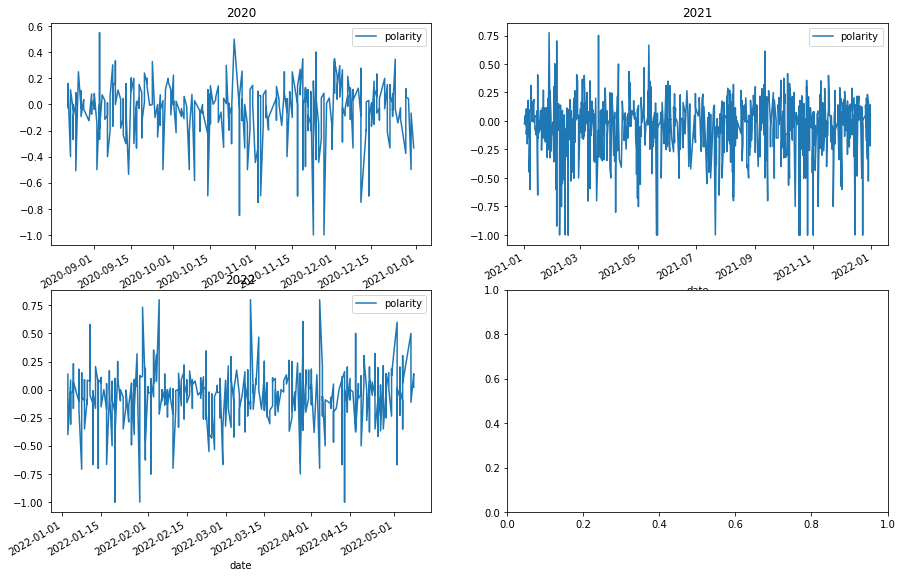

In [301]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
#reviewsDF2011.plot.line(x='date',y='polarity',ax=axes[0,0])
reviewsDF2020.plot.line(x='date',y='polarity',ax=axes[0,0],title='2020')
reviewsDF2021.plot.line(x='date',y='polarity',ax=axes[0,1],title='2021')
reviewsDF2022.plot.line(x='date',y='polarity',ax=axes[1,0],title='2022')

In [302]:
#Let's create a DF with the total number of positive and negative reviews detected for each year
sentimentDF = pd.DataFrame(0,range(5),columns=['Year','pos','neg'])
sentimentDF

,Year,pos,neg
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [303]:
sentimentDF.loc[0] = [2020,reviewsDF2020.Sentiment.value_counts()['pos'],reviewsDF2020.Sentiment.value_counts()['neg']]
sentimentDF.loc[1] = [2021,reviewsDF2021.Sentiment.value_counts()['pos'],reviewsDF2021.Sentiment.value_counts()['neg']]
sentimentDF.loc[2] = [2022,reviewsDF2022.Sentiment.value_counts()['pos'],reviewsDF2022.Sentiment.value_counts()['neg']]

In [304]:
sentimentDF

,Year,pos,neg
0,2020,142,232
1,2021,419,665
2,2022,205,295
3,0,0,0
4,0,0,0


<AxesSubplot:xlabel='Year'>

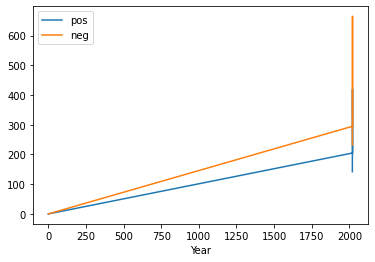

In [305]:
#Plot of positive vs negative reviews over the years
sentimentDF.plot.line(x='Year')

# **LDA & Topic trend**

Now, even though the LSA provided the topics, let's analyze the topics using LDA in order to analyze the trend and to better visualize the topics 

In [306]:
df = reviewsDF
df

,date,author,text,title,stars,location,url,site,length,numOfWords,polarity,neg,neu,pos,compound,Sentiment,rating,Site
0,2022-02-22,customer,package never delivered vestiaire demanded sen...,awful experience avoid,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,475,67,0.014286,0.091,0.726,0.183,0.6437,pos,1,vestiairecollective.com?page=15&stars=1&stars=...
1,2022-02-22,Monica Dougall,sold paid dior jean site brand new never worn ...,awful customer expereince,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,451,72,-0.202746,0.198,0.764,0.039,-0.9024,neg,1,vestiairecollective.com?page=15&stars=1&stars=...
2,2022-02-22,SS,worst experience shopping vestiaire it’s impos...,worst experience…,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,269,38,-0.266667,0.172,0.654,0.174,0.0232,pos,1,vestiairecollective.com?page=15&stars=1&stars=...
3,2022-02-23,J Steventon,sell little site charge extortionate cannot se...,poor customer service extortionate cost,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,299,45,-0.022917,0.165,0.706,0.128,-0.2500,neg,1,vestiairecollective.com?page=15&stars=1&stars=...
4,2022-02-23,Daria Belinska,almost every time post item sale description m...,almost every time post item…,2,FR,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,181,26,-0.550000,0.195,0.805,0.000,-0.7003,neg,2,vestiairecollective.com?page=15&stars=1&stars=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2021-01-01,ttp .n1,hi received email support item send receipt se...,response week,1,CZ,https://www.trustpilot.com/review/vestiairecol...,reviews_82.json,237,38,-0.025000,0.000,0.932,0.068,0.4019,pos,1,vestiairecollective.com?page=82&stars=1&stars=...
16,2021-01-02,Marlena,sold many product via platform charge seller e...,sold product didn’t get payment,1,PL,https://www.trustpilot.com/review/vestiairecol...,reviews_82.json,425,61,0.000000,0.106,0.858,0.036,-0.6997,neg,1,vestiairecollective.com?page=82&stars=1&stars=...
17,2021-01-02,Florian,purchased received pair saint laurent boot upo...,use paypal payment,3,US,https://www.trustpilot.com/review/vestiairecol...,reviews_82.json,738,99,0.050000,0.070,0.840,0.090,0.0408,pos,3,vestiairecollective.com?page=82&stars=1&stars=...
18,2021-01-03,Bricklinng,buyer shopped brand new item shipped back dama...,buyer shopped brand new item and…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_82.json,152,22,-0.115909,0.452,0.548,0.000,-0.9186,neg,1,vestiairecollective.com?page=82&stars=1&stars=...


In [307]:
warnings.filterwarnings('ignore')

reviews = list(df['text'])
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
reviews = pd.Series(reviews).apply(lambda x: x.split())
r1 = []
for wrd in reviews:
  doc = nlp(" ".join(wrd))
  r1.append([token.lemma_ for token in doc if token.pos_ in ['NOUN','ADJ']])

reviewsR1 = r1

In [308]:
#LDA
dictionary = corpora.Dictionary(reviewsR1)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviewsR1]

In [309]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=20, random_state=42,chunksize=1000, passes=50)

In [310]:
#The top 20 topics that the LDA model has learned are
lda_model.print_topics()

[(0,
  '0.048*"item" + 0.041*"fee" + 0.036*"custom" + 0.018*"time" + 0.018*"size" + 0.017*"customer" + 0.013*"pay" + 0.012*"vestiaire" + 0.011*"charge" + 0.011*"service"'),
 (1,
  '0.044*"item" + 0.029*"vestiaire" + 0.018*"price" + 0.015*"service" + 0.013*"collective" + 0.012*"system" + 0.012*"offer" + 0.012*"time" + 0.011*"low" + 0.011*"form"'),
 (2,
  '0.048*"tag" + 0.048*"dress" + 0.016*"apparent" + 0.013*"brand" + 0.011*"current" + 0.006*"brandnew" + 0.006*"release" + 0.006*"antigona" + 0.005*"pretend" + 0.005*"resolution"'),
 (3,
  '0.138*"package" + 0.063*"d" + 0.048*"investigation" + 0.048*"i" + 0.036*"vestiaire" + 0.025*"fedex" + 0.022*"open" + 0.021*"claim" + 0.019*"information" + 0.017*"handwritten"'),
 (4,
  '0.072*"seller" + 0.065*"item" + 0.038*"order" + 0.022*"vestiaire" + 0.021*"customer" + 0.019*"day" + 0.016*"refund" + 0.016*"purchase" + 0.016*"service" + 0.016*"money"'),
 (5,
  '0.117*"quality" + 0.077*"control" + 0.041*"duty" + 0.040*"coat" + 0.034*"import" + 0.033*"

In [311]:
#Just to check the correctness
lda_model.get_document_topics(doc_term_matrix[1])

[(3, 0.11258898),
 (5, 0.07578565),
 (8, 0.09478748),
 (9, 0.19222237),
 (17, 0.5043403)]

Using the **pyLDAvis** let's visualize the topics and relations

In [312]:
#Visualizing using the pyLDAvis inbuilt viz
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/local/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/local/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/local/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/local/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; se

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.241195  0.082386       1        1  26.379068
9     -0.186618 -0.065691       2        1  15.203996
17    -0.210001  0.107583       3        1  11.675622
4     -0.204663  0.048710       4        1   8.651581
14    -0.184070 -0.019389       5        1   7.999625
11    -0.064657 -0.197199       6        1   4.163295
0     -0.093391  0.019564       7        1   3.946565
1     -0.097114  0.011199       8        1   3.908796
5      0.036845 -0.220582       9        1   2.576212
8      0.070391 -0.058278      10        1   2.413023
6      0.006104  0.258018      11        1   2.202167
16    -0.021484 -0.062533      12        1   2.123990
13     0.033830 -0.051527      13        1   1.647219
7      0.074588 -0.019023      14        1   1.624645
15     0.076460 -0.047667      15        1   1.609850
3      0.186540  0.089494      16        1   1.186696
19     0.196505  0.022032      17        1   1.044714
12     0.179934  0.013461      18        1   0.657998
18     0.212425  0.063693      19        1   0.625149
2      0.229573  0.025750      20        1   0.359789, topic_info=           Term         Freq        Total Category  logprob  loglift
25      service  1374.000000  1374.000000  Default  30.0000  30.0000
6      customer  1496.000000  1496.000000  Default  29.0000  29.0000
40         item  3346.000000  3346.000000  Default  28.0000  28.0000
179        fake   375.000000   375.000000  Default  27.0000  27.0000
120         bag   877.000000   877.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
994       shame     0.972589    54.362907  Topic20  -5.6393   1.6039
730  individual     0.741379    10.001767  Topic20  -5.9107   3.0254
341        hand     0.964128    63.327302  Topic20  -5.6480   1.4426
44          new     1.178295   260.733188  Topic20  -5.4474   0.2280
17     question     0.921166   122.152807  Topic20  -5.6936   0.7400

[1321 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
2980      7  0.867800   abd
599       1  0.255506  able
599       2  0.054751  able
599       3  0.136878  able
599       4  0.319383  able
...     ...       ...   ...
1075      2  0.039253    ’s
1075      3  0.235521    ’s
1075      5  0.431788    ’s
1075     11  0.235521    ’s
2225     12  0.901510   ’ve

[2907 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 10, 18, 5, 15, 12, 1, 2, 6, 9, 7, 17, 14, 8, 16, 4, 20, 13, 19, 3])

In [313]:
#Let's add a new column in the main df to get the topic number for each review
doc_lda = lda_model[doc_term_matrix]
max_topics = [max(sent, key=lambda x: x[1])[0] for sent in doc_lda]

In [314]:
dftopic = df
dftopic['topic'] = max_topics

In [315]:
dftopic

,date,author,text,title,stars,location,url,site,length,numOfWords,polarity,neg,neu,pos,compound,Sentiment,rating,Site,topic
0,2022-02-22,customer,package never delivered vestiaire demanded sen...,awful experience avoid,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,475,67,0.014286,0.091,0.726,0.183,0.6437,pos,1,vestiairecollective.com?page=15&stars=1&stars=...,10
1,2022-02-22,Monica Dougall,sold paid dior jean site brand new never worn ...,awful customer expereince,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,451,72,-0.202746,0.198,0.764,0.039,-0.9024,neg,1,vestiairecollective.com?page=15&stars=1&stars=...,17
2,2022-02-22,SS,worst experience shopping vestiaire it’s impos...,worst experience…,1,US,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,269,38,-0.266667,0.172,0.654,0.174,0.0232,pos,1,vestiairecollective.com?page=15&stars=1&stars=...,9
3,2022-02-23,J Steventon,sell little site charge extortionate cannot se...,poor customer service extortionate cost,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,299,45,-0.022917,0.165,0.706,0.128,-0.2500,neg,1,vestiairecollective.com?page=15&stars=1&stars=...,9
4,2022-02-23,Daria Belinska,almost every time post item sale description m...,almost every time post item…,2,FR,https://www.trustpilot.com/review/vestiairecol...,reviews_15.json,181,26,-0.550000,0.195,0.805,0.000,-0.7003,neg,2,vestiairecollective.com?page=15&stars=1&stars=...,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2021-01-01,ttp .n1,hi received email support item send receipt se...,response week,1,CZ,https://www.trustpilot.com/review/vestiairecol...,reviews_82.json,237,38,-0.025000,0.000,0.932,0.068,0.4019,pos,1,vestiairecollective.com?page=82&stars=1&stars=...,10
16,2021-01-02,Marlena,sold many product via platform charge seller e...,sold product didn’t get payment,1,PL,https://www.trustpilot.com/review/vestiairecol...,reviews_82.json,425,61,0.000000,0.106,0.858,0.036,-0.6997,neg,1,vestiairecollective.com?page=82&stars=1&stars=...,10
17,2021-01-02,Florian,purchased received pair saint laurent boot upo...,use paypal payment,3,US,https://www.trustpilot.com/review/vestiairecol...,reviews_82.json,738,99,0.050000,0.070,0.840,0.090,0.0408,pos,3,vestiairecollective.com?page=82&stars=1&stars=...,10
18,2021-01-03,Bricklinng,buyer shopped brand new item shipped back dama...,buyer shopped brand new item and…,1,GB,https://www.trustpilot.com/review/vestiairecol...,reviews_82.json,152,22,-0.115909,0.452,0.548,0.000,-0.9186,neg,1,vestiairecollective.com?page=82&stars=1&stars=...,14


In [316]:
#the topics for the whole df
dftopic.topic.value_counts()

10    650
9     279
17    264
4     197
14    136
11     67
0      65
1      62
6      51
16     36
5      33
8      24
15     23
13     21
7      20
19      8
12      7
18      6
3       5
2       4
Name: topic, dtype: int64

In [317]:
#Topic numbers for the year 2020
topic2020 = dftopic[dftopic.date.dt.year==2020]['topic'].value_counts().index.tolist()

In [318]:
#Topic numbers for the year 2021
topic2021 = dftopic[dftopic.date.dt.year==2021]['topic'].value_counts().index.tolist()

In [319]:
#Topic numbers for the year 2022
topic2022 = dftopic[dftopic.date.dt.year==2022]['topic'].value_counts().index.tolist()

The topics learned for each Year

In [320]:
print("2020 - ",topic2020,"\n2021 - ",topic2021,"\n2022 - ",topic2022)

2020 -  [10, 9, 17, 4, 14, 11, 0, 1, 16, 6, 5, 13, 15, 7, 8, 19] 
2021 -  [10, 9, 17, 4, 14, 0, 1, 11, 6, 16, 5, 15, 7, 8, 13, 19, 18, 12, 2, 3] 
2022 -  [10, 9, 17, 4, 14, 6, 11, 1, 0, 8, 5, 13, 16, 15, 7, 12, 3, 19, 18]


The list of all the topics learned with the LDA model

In [321]:
for i in range(len(lda_model.print_topics())):
  print("Topic:%i" %i ," - ", lda_model.print_topics()[i][1], '\n')

Topic:0  -  0.048*"item" + 0.041*"fee" + 0.036*"custom" + 0.018*"time" + 0.018*"size" + 0.017*"customer" + 0.013*"pay" + 0.012*"vestiaire" + 0.011*"charge" + 0.011*"service" 

Topic:1  -  0.044*"item" + 0.029*"vestiaire" + 0.018*"price" + 0.015*"service" + 0.013*"collective" + 0.012*"system" + 0.012*"offer" + 0.012*"time" + 0.011*"low" + 0.011*"form" 

Topic:2  -  0.048*"tag" + 0.048*"dress" + 0.016*"apparent" + 0.013*"brand" + 0.011*"current" + 0.006*"brandnew" + 0.006*"release" + 0.006*"antigona" + 0.005*"pretend" + 0.005*"resolution" 

Topic:3  -  0.138*"package" + 0.063*"d" + 0.048*"investigation" + 0.048*"i" + 0.036*"vestiaire" + 0.025*"fedex" + 0.022*"open" + 0.021*"claim" + 0.019*"information" + 0.017*"handwritten" 

Topic:4  -  0.072*"seller" + 0.065*"item" + 0.038*"order" + 0.022*"vestiaire" + 0.021*"customer" + 0.019*"day" + 0.016*"refund" + 0.016*"purchase" + 0.016*"service" + 0.016*"money" 

Topic:5  -  0.117*"quality" + 0.077*"control" + 0.041*"duty" + 0.040*"coat" + 0.034

We can see from above that:

In 2011: There are only 2 topics - Topic #15 and Topic#0

In [322]:
lda_model.print_topics()[0][1]

'0.048*"item" + 0.041*"fee" + 0.036*"custom" + 0.018*"time" + 0.018*"size" + 0.017*"customer" + 0.013*"pay" + 0.012*"vestiaire" + 0.011*"charge" + 0.011*"service"'

In [323]:
list(set(topic2020).intersection(topic2021))

[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19]

From 2011 to 2015 there are two common topics

In [324]:
list(set(topic2020).intersection(topic2022))

[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19]

We can see that from 2015 to 2016 Topic #0 and #15 have been continued, and many more topics have been added

In [325]:
list(set(topic2021).intersection(topic2022))

[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [326]:
for i in range(20):
  print("Topic:%i" %i )
  print(df[df.topic == i]['rating'].value_counts().index[0])

Topic:0
1
Topic:1
1
Topic:2
1
Topic:3
1
Topic:4
1
Topic:5
1
Topic:6
1
Topic:7
1
Topic:8
1
Topic:9
1
Topic:10
1
Topic:11
1
Topic:12
1
Topic:13
1
Topic:14
1
Topic:15
1
Topic:16
1
Topic:17
1
Topic:18
1
Topic:19
1


we can see that almost all the topics have the highest number of negative reviews except Topic #6 and #3

From the above learned topics, let's consider one of the most common topic #10 that has been talked about since 2015, which indicates it's one of the most important things people are talking about 

In [327]:
#Let's see some reviews with the topic #10
list(df[df.topic == 10]['text'][:20])

['package never delivered vestiaire demanded send copy id signed letter would open investigation courier even open investigation bouncing around customer support agent dont answer question worse robot lie customer year never avoid unless enjoy scammededit respond reply liar already heard rep couldnt anything received case number despite multiple request want money back dont item refund scammer pretending customer service something hope others stay far away company reported',
 'worst experiencei wanted sell bag mentioned couldnt authenticated said pay return fee accepted direct bank deposit bank france paypal credit card allowed first didnt mention website work want item back fee etc secondly want make wire deposit bank usually fee depending bank finally used online money transfer sent proof payment completely day asked sent proof payment iban use proofsuch simple straightforward thing doesnt need week get fixed end sent item coin purse included bag partial still dont know mistake stole

In [328]:
df[df.topic == 10]['rating'].value_counts()

1    600
2     32
3     18
Name: rating, dtype: int64

We can see from above that most of the reviews are negative, and almost more thatn 75% of the reviews have a 1-star rating. So, we can confirm that this is one of the most important topic people have been talking about over the years.

Similarly we can analyze the rest of the topics depending on the requirement, and how the service wants to be improved, for example if they want to improve the Application, they can see the topic most related to "app" and then do the same analysis as above. 